<h2 style="text-align: center;"><b>Домашнее задание 3. Математика для DS.
</b></h2>

В этом домашнем задании мы вспомним немного математики и закрепим PCA.


## Задание 1

1 балл

Посчитайте производную $f(x)=x^x$ в точке $x_0 = e$

Тут надо действовать хитро. По определению взять не получится.

Ответ округлите до десятых.

In [ ]:
from sympy import diff, sin, cos, tan, exp, log 
from sympy.abc import x, y 
from sympy.utilities.lambdify import lambdify
import math
import pandas as pd

In [ ]:
diff(x**x,x)

x**x*(log(x) + 1)

In [ ]:
f1 = lambdify(x,diff(x**x,x))

In [ ]:
f1(math.e).round(1)

30.3

**Ответ:** 30.3

## Задание 2

2 балла

Вычислите производную $f(x)=tg(x)⋅ln(cos(x^2)+1)$, в точке $x_0 = 0$

In [ ]:
tan(x)*log(cos(x**2)+1)

log(cos(x**2) + 1)*tan(x)

In [ ]:
diff(tan(x)*log(cos(x**2)+1),x)

-2*x*sin(x**2)*tan(x)/(cos(x**2) + 1) + (tan(x)**2 + 1)*log(cos(x**2) + 1)

In [ ]:
f2 = lambdify(x,diff(tan(x)*log(cos(x**2)+1),x))

In [ ]:
f2(0)

0.6931471805599453

**Ответ:** 0.69

## Задание 3 ##

3 балла

Предположим, у вас есть функция, и вы бы хотели знать ее производную, но у вас нет аналитического выражения для нее.
Ваше задание --- написать функцию, которая будет вычислять производную ... кхм функции. Тавтология --- это не очень приятно, но я думаю, что Вы поняли что нужно делать.
Однако не подумайте, что вас просят написать что-то, что будет вычислять эту самую производную аналитически.
Попробуйте это сделать приближенно, опираясь на определение производной.

__Напоминание:__
Если вдруг вы не помните определение производной, то вот оно:

$$\lim_{h→0}\frac{f(x+h)−f(x)}{h}$$
Или, что то же:
$$\lim_{x→x_0}\frac{f(x)−f(x_0)}{x-x_0}$$

Если такой предел существует, то и производная существует (и равна этому пределу).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sympy import limit
from sympy import Symbol 
from sympy.abc import epsilon, h
x0 = Symbol('x0')

In [ ]:
def numerical_derivative_1d(func, epsilon, x0):
    """
    Функция для приближённого вычисления производной функции одной переменной. 
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """
    f3 = lambdify(x,func)

    df3 = lambdify(x,limit((f3(x+h)-f3(x))/h,h,epsilon))
      
    return df3(x0)

In [ ]:
numerical_derivative_1d(20 * x**5 + x**3 - 5 * x**2 + 2 * x + 2.0,0,1)

95

# Задание 4 - сжатие звука

Σ 12 баллов за все подпункты

Помните как на лекции мы сжимали картинки с помощью PCA? Теперь вам предлагается сделать тоже самое, но со звуком!

In [ ]:
# понадобится для чтения и записи аудио файлов
from scipy.io import wavfile

# это нужно для проигрывания аудио файлов прямо в колабе
from IPython.display import Audio

Считаем wav файл и посмотрим его содержимое

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# ссылка для скачивания файла с гугл диска https://drive.google.com/file/d/1WmORZGngnOn2tMzyAEQOu1gps0ZxsgpB/view?usp=sharing

# Вставьте свой путь к файлу в строчке ниже
samplerate, data = wavfile.read('/content/gdrive/Othercomputers/Ноутбук/Desktop/Семинары/ДЗ2/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav')


Выведем частоту дискретизации - она тут стандартная для аудио: 44100 герца

Она говорит о том, сколько последовательных элементов массива с сигналом кодируют звук длительностью 1 секунда.

Подробнее о кодировании звука читайте тут: https://ru.wikipedia.org/wiki/Кодирование_звуковой_информации

In [ ]:
samplerate

44100

Соответсвенно, если поделить длину массива сигнала на samplerate, получится длительность аудиодорожки в секундах

In [ ]:
# 45 секунд - похоже на правду)
len(data)/samplerate

45.139591836734695

Заметим, что звук - стерео, так как сигнал кодируется двумя каналами (для левого и правого динамика):

In [ ]:
data.shape

(1990656, 2)

Выведем сигналы в обоих каналах

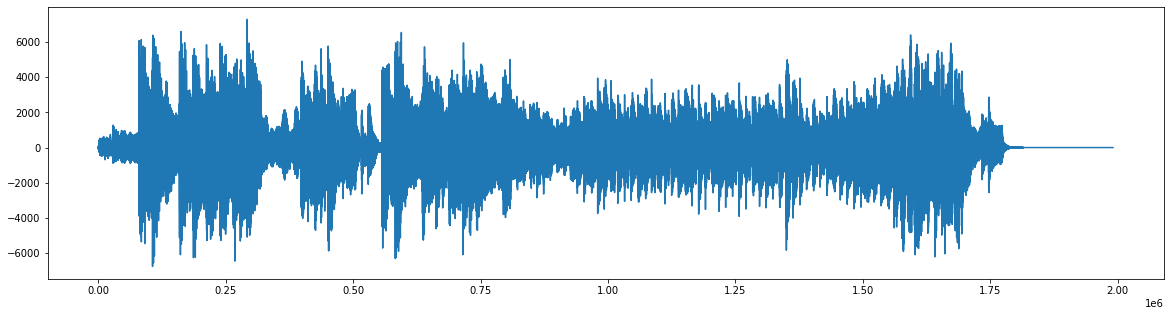

In [ ]:
# Канал 1
plt.figure(figsize=(20,5))
plt.plot(data[:,0])
plt.show()


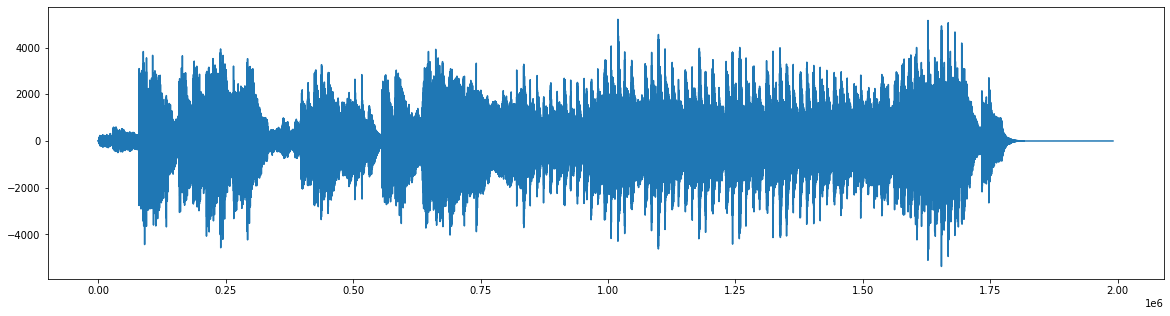

In [ ]:
# Канал 2
plt.figure(figsize=(20,5))
plt.plot(data[:,1])
plt.show()

Усредним каналы, и получим моно звук, с которым будет проще работать

In [ ]:
mono_sound = np.mean(data, axis=1)
print(mono_sound.shape)

(1990656,)


Давайте послушаем наконец, что же мы будем сжимать

In [ ]:
Audio(mono_sound, rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

Для удобства - обрежем массив с сигналом так, чтобы его было удобнее делить на равные части, датасет из которых и необходимо будет сжать известными вам методами. На самом деле способ очень похож на тот, которым мы сжимали картинку, деля её на прямоугольные подкартинки)

In [ ]:
mono_sound_to_cut = mono_sound[:1990000]

## Задание 4.1

3 балла

1) Разделите сигнал на равные части - размер частей выбирайте на ваше усмотрение. Рекомендуется 500 или 1000

2) Соберите из них "датасет", который будет представим в виде двуменого массива - "матрицы"

3) Сразу напишите функцию, которая будет переводить вашу "матрицу" обратно в звуковой сигнал. Проверьте что все работает, путем воспроизведения востановленного сигнала.

In [ ]:
sound_blocks = np.split(mono_sound_to_cut, len(mono_sound_to_cut)/1000)

In [ ]:
sound_blocks_matrix = np.array(sound_blocks)

In [ ]:
def new_mono_sound(data):
  new_mono_sound = np.reshape(data, data.shape[0]*data.shape[1])
  return Audio(new_mono_sound, rate = samplerate)

In [ ]:
new_mono_sound(sound_blocks_matrix)

Output hidden; open in https://colab.research.google.com to view.

## Задание 4.2

3 балла

1) Выполните PCA преобразование, и получите данные, сжатые в пространство меньшей размерности  

2) Постройте сами главные компоненты в наглядной форме. Сделайте выводы исходя из их вида.

3) Постройте scatter plot датасета в просрансве первых двух компонент, а третью используйте как цвет


In [ ]:
from sklearn.decomposition import PCA

1) Выполните PCA преобразование, и получите данные, сжатые в пространство меньшей размерности

In [ ]:
def main_component(data, n_components=1000):
  pca = PCA(n_components=n_components)
  pca.fit_transform(data)
  return plt.plot(pca.explained_variance_ratio_.cumsum())

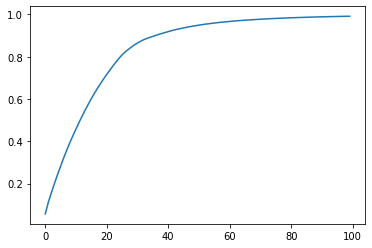

In [ ]:
main_component(sound_blocks_matrix, n_components=100)

In [ ]:
def reduce_pca(data, n_components):
  pca = PCA(n_components=n_components)
  return pca.fit_transform(data)

In [ ]:
reduce_pca(sound_blocks_matrix, 100).shape

(1990, 100)

2) Постройте сами главные компоненты в наглядной форме. Сделайте выводы исходя из их вида.

In [ ]:
pca = PCA(n_components=40)
pca_matrix = pca.fit_transform(sound_blocks_matrix)
pca_matrix.shape 

(1990, 40)

In [ ]:
pca_comp = pca.components_
pca_comp.shape

(40, 1000)

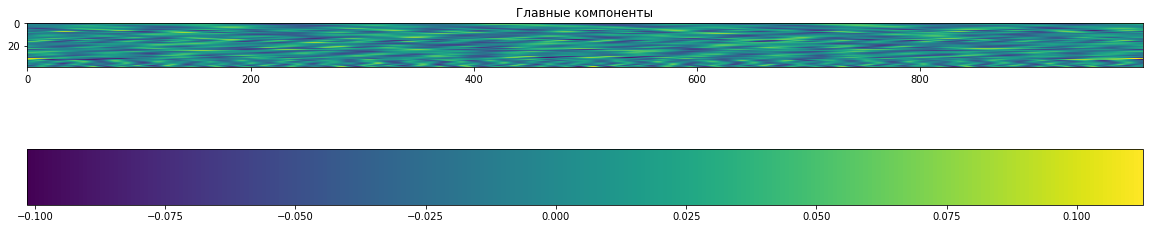

In [ ]:
plt.figure(figsize=(20, 10))
plotcomp = plt.imshow(pca_comp)

cbar = plt.colorbar(plotcomp, orientation='horizontal')
plt.title("Главные компоненты")

plt.show()

In [ ]:
import seaborn as sns

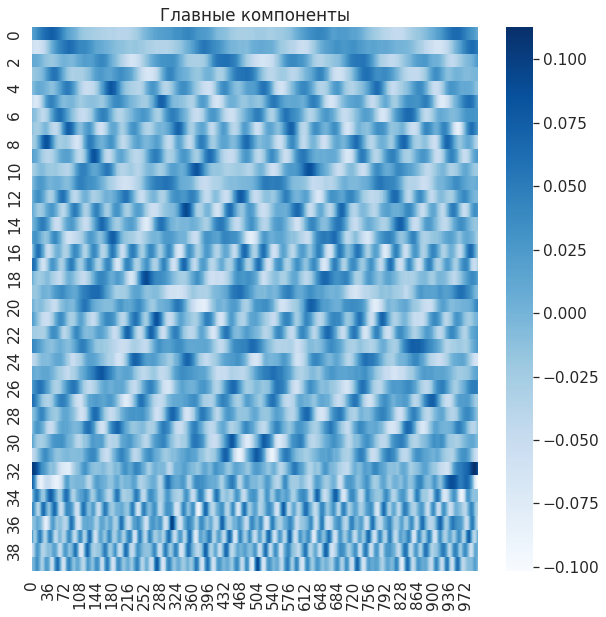

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,10))
sns.heatmap(pca_comp,cbar=True,cmap='Blues', annot=False)
plt.title("Главные компоненты")
plt.show() 

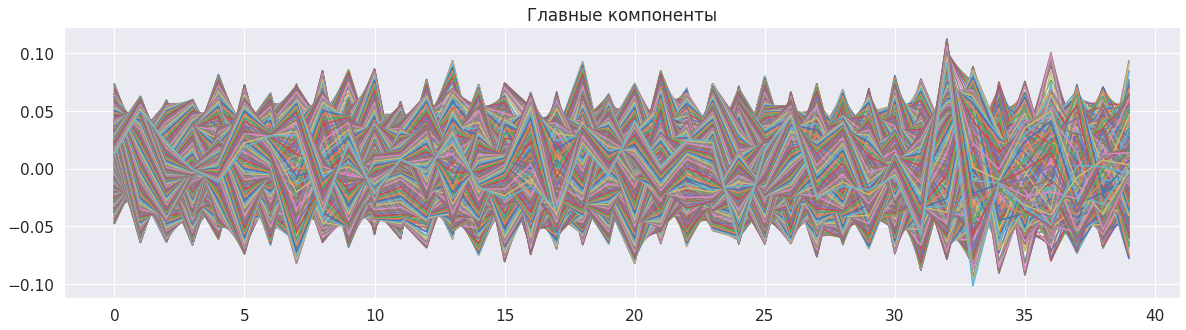

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(pca_comp)
plt.title("Главные компоненты")
plt.show()

Матрица главных компонен содержит значения, лежащие (по большей части) в диапазоне от - 0.1 до 0.1

3) Постройте scatter plot датасета в просрансве первых двух компонент, а третью используйте как цвет

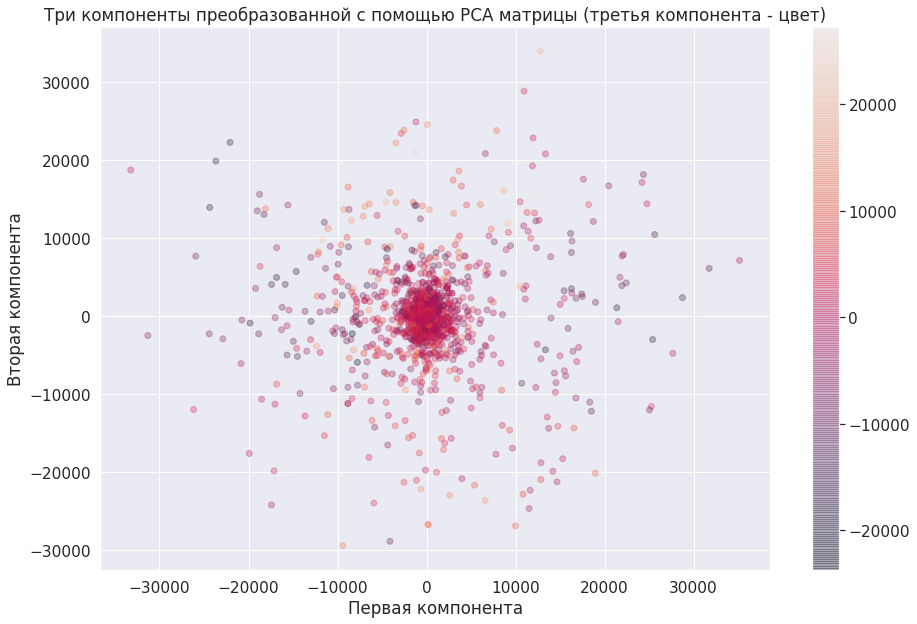

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(reduce_pca(sound_blocks_matrix, 100)[:,0], reduce_pca(sound_blocks_matrix, 100)[:,1], c = reduce_pca(sound_blocks_matrix, 100)[:,2], alpha=0.3)
plt.colorbar()
plt.title("Три компоненты преобразованной с помощью РСА матрицы (третья компонента - цвет)")
plt.xlabel("Первая компонента")
plt.ylabel("Вторая компонента")
plt.show()

## Задание 4.3

2 балла

1) Выполните обратное PCA преобразование сжатыз данных и получите "матрицу" с сжатым звуком

2) Преобразуйте "матрицу" в сигнал (одномерный массив), и послушайте результат

In [ ]:
P = pca_matrix @ pca_comp
P.shape

(1990, 1000)

In [ ]:
pca_inverse = pca.inverse_transform(pca_matrix)
pca_inverse.shape

(1990, 1000)

In [ ]:
new_mono_sound(pca_inverse)

Output hidden; open in https://colab.research.google.com to view.

Подсказка! попробуйте отфильтровать сигнал с помощью функции gaussian_filter1d из scipy.ndimage. Это поможет убрать неприятный дробовой шум при сильном сжатии

Пример кода для фильтрации - Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate)

In [ ]:
from scipy.ndimage import gaussian_filter1d

In [ ]:
Audio(gaussian_filter1d(np.reshape(pca_inverse, pca_inverse.shape[0]*pca_inverse.shape[1]), 2), rate = samplerate)

Output hidden; open in https://colab.research.google.com to view.

## Задание 4.4

4 балла

1) Оберните получившийся код по сжатию звука в одну или несколько функций

2) Проведите исследование того, как степень сжатия (соотношения размера частей, на которые делился сигнал в п. 4.1 к размеру пространсва, в которое вы сжимали данные с помощью PCA) влияет на звук, по субъективным ощущениям. Начиная с какой степени сжания сильно слышится потеря качества? (как с учетом фильтрации с помощью gaussian_filter1d, так и без неё)

In [ ]:
def compres_sound(data, n_blocks, n_components):
  # разбиение массива на блоки, формирование матрицы
  sound_blocks = np.split(data, len(data)/n_blocks)
  sound_blocks_matrix = np.array(sound_blocks)
  # РСА преобразование 
  pca = PCA(n_components=n_components)
  pca_matrix = pca.fit_transform(sound_blocks_matrix)
  pca_inverse = pca.inverse_transform(pca_matrix)
  new_sound = np.reshape(pca_inverse, pca_inverse.shape[0]*pca_inverse.shape[1])
  # визуализация
  plt.figure(figsize=(20,5))
  plt.plot(mono_sound_to_cut, label='Исходный звук')
  plt.plot(new_sound, label='Закодированный звук')
  plt.legend(loc='upper right')

  return Audio(new_sound, rate = samplerate)
  plt.show()

In [ ]:
compres_sound(mono_sound_to_cut, 500, 40)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def compres_sound_with_gaussian_filter1d(data, n_blocks, n_components):
  # разбиение массива на блоки, формирование матрицы
  sound_blocks = np.split(data, len(data)/n_blocks)
  sound_blocks_matrix = np.array(sound_blocks)
  # РСА преобразование 
  pca = PCA(n_components=n_components)
  pca_matrix = pca.fit_transform(sound_blocks_matrix)
  pca_inverse = pca.inverse_transform(pca_matrix)
  new_sound = np.reshape(pca_inverse, pca_inverse.shape[0]*pca_inverse.shape[1])
  
  return Audio(gaussian_filter1d(new_sound, 2), rate = samplerate)

In [ ]:
compres_sound_with_gaussian_filter1d(mono_sound_to_cut, 500, 30)

Output hidden; open in https://colab.research.google.com to view.

Вывод: чем ниже спепень сжатия (n_blocks / n_components), тем лучше звук. Улушение качества звука достигается при уменьшении числителя (размер частей, на которые делился сигнал) и увеличении знаменателя (колличество копонент РСА).

Субьективно, ощутимая потеря качества наблюдается при степени сжатия более 12.5. Использование фильтра позволяет сжать звук примерно до степени 16.5 без значительной потери качества.

